# Medical Data Classification with Linear Models

## Introduction
In this project, I developed a supervised machine learning pipeline to classify fetal health based on cardiotocography (CTG) measurements.  
The focus was on:
- Exploring and preprocessing the dataset  
- Performing a balanced train/test split  
- Scaling features to ensure stable training  
- Training and evaluating three linear models (Perceptron, Adaline, Logistic Regression) from `mlxtend`  
- Investigating how dataset size and training time (epochs) affect accuracy  

## Part I: Data loading and data exploration

### Import necessary libraries/modules:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.classifier import Perceptron, Adaline, LogisticRegression

### Loading and exploring data

#### 1. Load the datset

In [2]:
# 1. Load the dataset and set first column as row index
df = pd.read_csv('fetal_health.csv', index_col = 0)
df.head(10)

baseline value  accelerations  prolongued_decelerations  \
1584           132.0          0.000                       0.0   
942            136.0          0.003                       0.0   
1376           121.0          0.006                       0.0   
169            116.0          0.001                       0.0   
1293           115.0          0.006                       0.0   
1271           119.0          0.000                       0.0   
1242           115.0          0.000                       0.0   
908            146.0          0.008                       0.0   
934            126.0          0.003                       0.0   
1482           132.0          0.000                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
1584                             35.0                                   1.3   
942                              54.0                                   0.7   
1376                             24.0                                   1.7   
169                              46.0                                   0.7   
1293                             19.0                                   1.7   
1271                             27.0                                   1.2   
1242                             20.0                                   1.7   
908                              28.0                                   1.3   
934                              25.0                                   1.8   
1482                             47.0                                   0.7   

      percentage_of_time_with_abnormal_long_term_variability  histogram_mean  \
1584                                                0.0                135.0   
942                                                15.0                141.0   
1376                                                0.0                121.0   
169                                                39.0                120.0   
1293                                                0.0                121.0   
1271                                                0.0                120.0   
1242                                                0.0                118.0   
908                                                 1.0                154.0   
934                                                 0.0                130.0   
1482                                                1.0                134.0   

      histogram_variance  fetal_health  
1584                 9.0             0  
942                  8.0             0  
1376                25.0             0  
169                  1.0             0  
1293                 9.0             0  
1271                 1.0             0  
1242                 4.0             0  
908                  6.0             0  
934                 12.0             0  
1482                 2.0             0

#### 2. Check for missing data

In [4]:
# 2. Check for missing data
df.isnull().sum()

baseline value                                            0
accelerations                                             0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
histogram_mean                                            0
histogram_variance                                        0
fetal_health                                              0
dtype: int64

There is no missing values in the dataset. 

#### 3. Display raw data with plots and inspect it

##### Basic Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1290 entries, 1584 to 2124
Data columns (total 9 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1290 non-null   float64
 1   accelerations                                           1290 non-null   float64
 2   prolongued_decelerations                                1290 non-null   float64
 3   abnormal_short_term_variability                         1290 non-null   float64
 4   mean_value_of_short_term_variability                    1290 non-null   float64
 5   percentage_of_time_with_abnormal_long_term_variability  1290 non-null   float64
 6   histogram_mean                                          1290 non-null   float64
 7   histogram_variance                                      1290 non-null   float64
 8   fetal_health                        

In [6]:
df.describe()

baseline value  accelerations  prolongued_decelerations  \
count     1290.000000    1290.000000               1290.000000   
mean       133.868217       0.002657                  0.000231   
std         10.093266       0.003681                  0.000719   
min        106.000000       0.000000                  0.000000   
25%        127.000000       0.000000                  0.000000   
50%        133.000000       0.001000                  0.000000   
75%        142.000000       0.004000                  0.000000   
max        160.000000       0.019000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      1290.000000                           1290.000000   
mean                         49.758915                              1.278682   
std                          17.770759                              0.916280   
min                          12.000000                              0.200000   
25%                          34.000000                              0.600000   
50%                          53.000000                              1.100000   
75%                          63.000000                              1.700000   
max                          87.000000                              6.900000   

       percentage_of_time_with_abnormal_long_term_variability  histogram_mean  \
count                                        1290.000000          1290.000000   
mean                                           12.637984           133.982946   
std                                            21.033866            17.140582   
min                                             0.000000            73.000000   
25%                                             0.000000           124.000000   
50%                                             0.000000           136.000000   
75%                                            17.000000           146.000000   
max                                            91.000000           182.000000   

       histogram_variance  fetal_health  
count         1290.000000   1290.000000  
mean            19.710078      0.362016  
std             32.399245      0.480770  
min              0.000000      0.000000  
25%              1.000000      0.000000  
50%              6.000000      0.000000  
75%             24.000000      1.000000  
max            269.000000      1.000000

##### Plot and Visualise

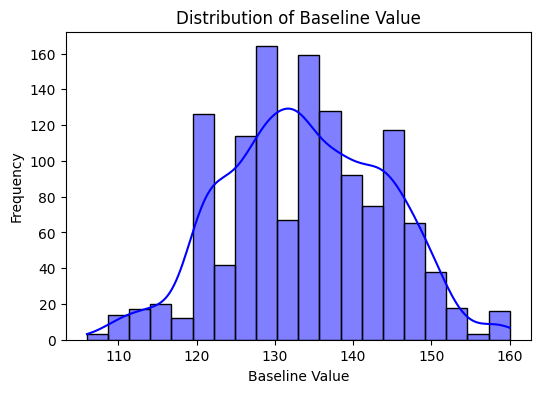

In [7]:
# Distribution of baseline value
plt.figure(figsize = (6, 4))
sns.histplot(df['baseline value'], kde = True, color = "blue")
plt.title('Distribution of Baseline Value')
plt.xlabel('Baseline Value')
plt.ylabel('Frequency')
plt.show()

There seems to be a somewhat normal distribution of the baseline value, with a peak around 130-140. 

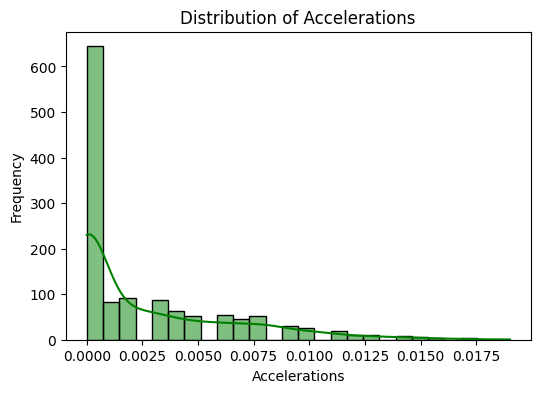

In [8]:
# Distribution of accelerations
plt.figure(figsize=(6, 4))
sns.histplot(df['accelerations'], kde=True, color='green')
plt.title('Distribution of Accelerations')
plt.xlabel('Accelerations')
plt.ylabel('Frequency')
plt.show()

Accelerations are highly skewed towards zero, with a long tail of higher values.

/var/folders/bp/p60zkz351mzdr8dqybp1z9t40000gn/T/ipykernel_68427/2999081669.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fetal_health', data=df, palette='Set2')


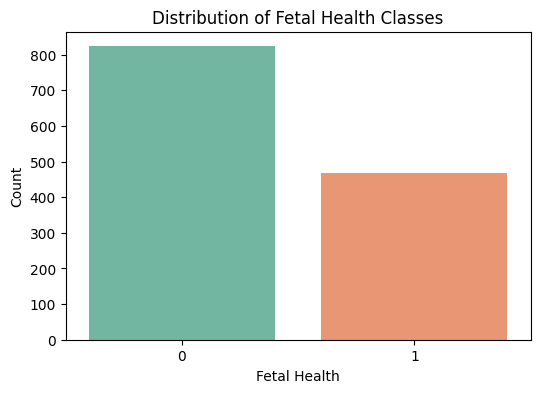

In [9]:
# Distribution of fetal_health
plt.figure(figsize=(6, 4))
sns.countplot(x='fetal_health', data=df, palette='Set2')
plt.title('Distribution of Fetal Health Classes')
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.show()

There is imbalance in the target variable, where the majority of the samples are in the 0-class. 

### 4. Will it be beneficial to scale the data? Why or why not?

It would be beneficial to scale the data because the features differs in scales and range. Algorithms would perform better when the features are on a similar scale. 

For instance, the accelerations feature has a much smaller range compared to the baseline value.

### 5. Is the data linearly separable using a combination of any two pairs of features? Can we expect an accuracy close to 100% from a linear classifier?
I'll make some visualisations/plots with combinations of features to inspect this. 

In [10]:
# Set up some pairs of features
feature_pairs = [
    ("baseline value", "accelerations"),
    ("baseline value", "histogram_mean"),
    ("accelerations", "histogram_variance"),
    ("mean_value_of_short_term_variability", "histogram_mean")
]

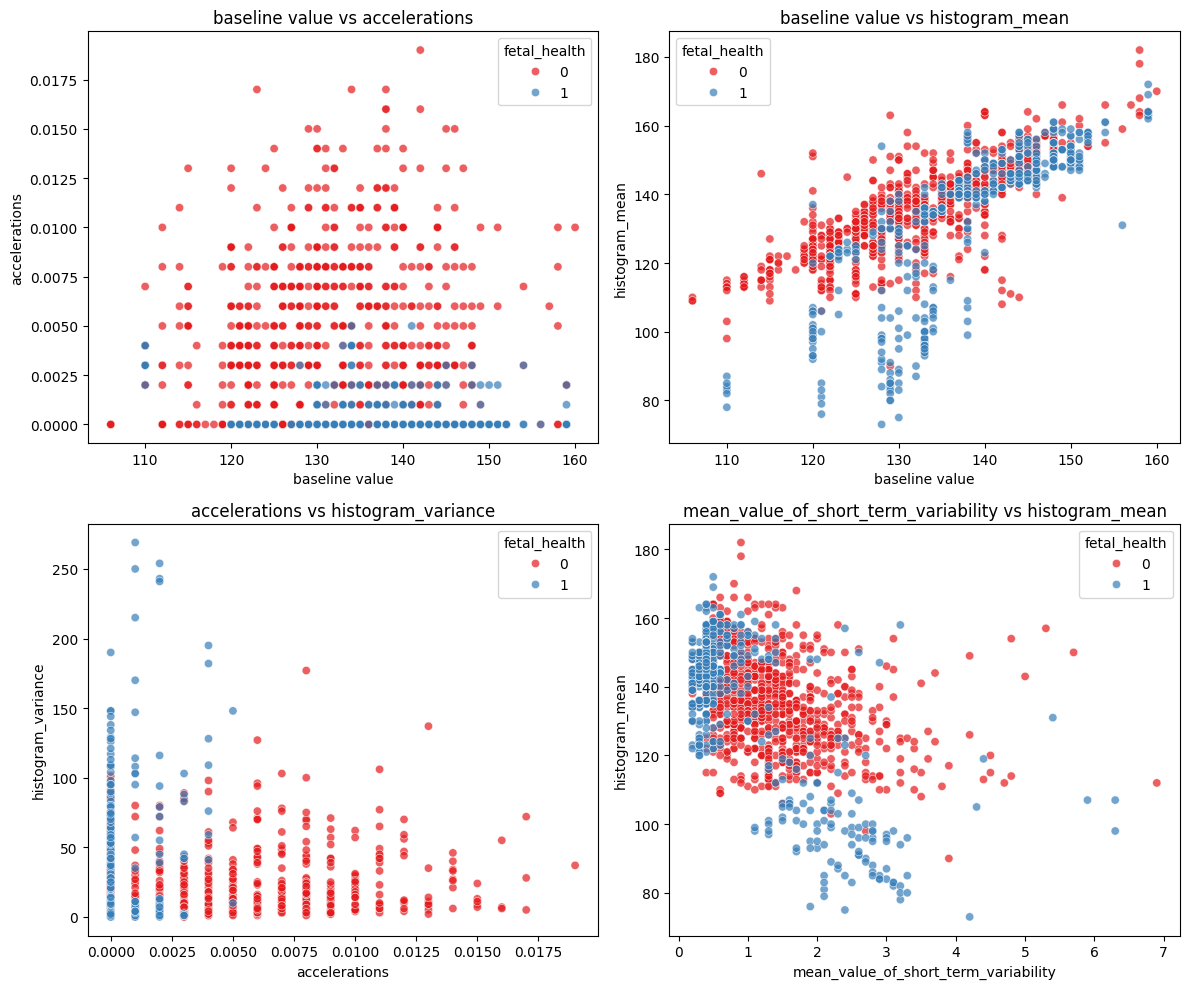

In [11]:
plt.figure(figsize=(12, 10))

for i, (feature_x, feature_y) in enumerate(feature_pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(
        x=df[feature_x],
        y=df[feature_y],
        hue=df["fetal_health"],
        palette="Set1",
        alpha=0.7
    )
    plt.title(f"{feature_x} vs {feature_y}")
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)

plt.tight_layout()
plt.show()

1. Baseline value vs. Accelerations: there is some overlaps between the classes, which suggests that a linear classifier might find it hard to separate the data using only these two features. 
2. Baseline value vs. Histogram mean: similar to the mentioned plot - a lot of overlap and the classes are not linearly separable. 
3. Accelerations vs. histogram mean: the datapoints are quite packed, with little distinction between classes, which would make linear separation difficult. 
4. Mean value of short term variability vs. histogram mean: there is also overlapping in this combination, which indicates a lack of clear linear separability. 

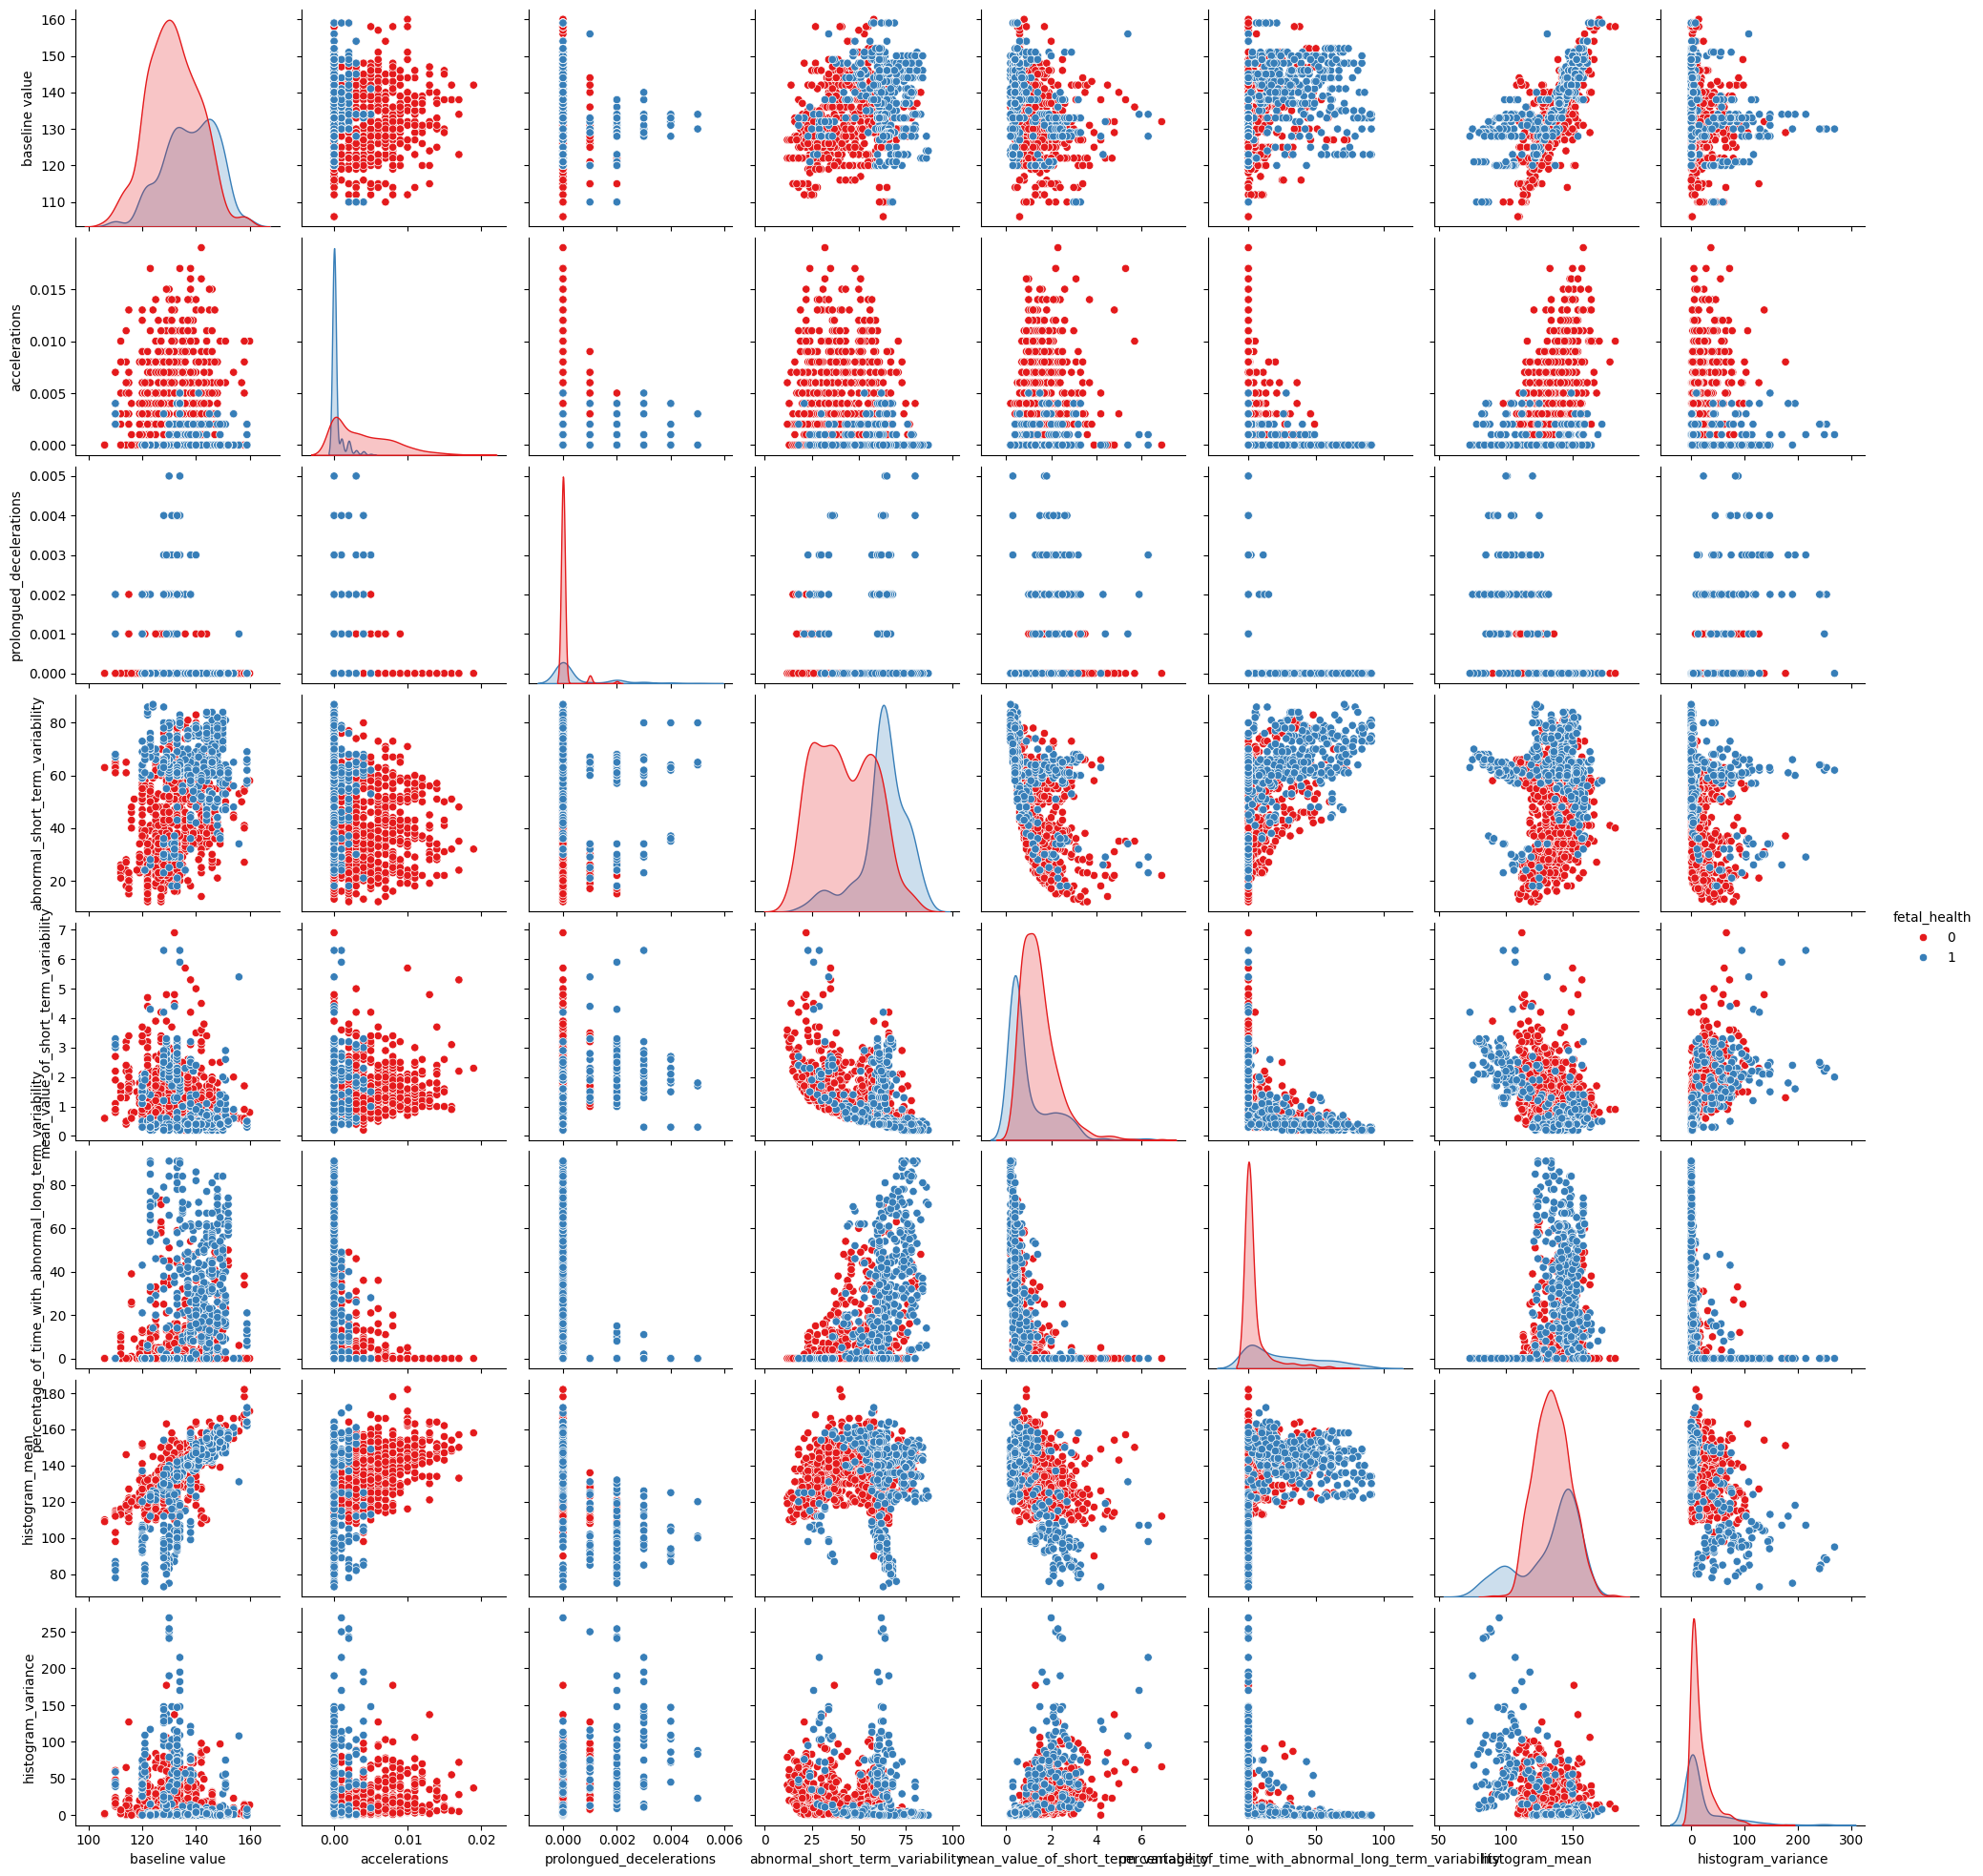

In [12]:
sns.pairplot(df, hue = "fetal_health", palette="Set1")
plt.show()

Here again we can see that the classes are not linearly separable for any pairs of features, with a lot of overlapping of the classes.

## Part II: Train/Test Split

Divide your dataset into training and testing subsets. Follow these steps to create the split:

1. **Divide the dataset into two data sets, each data set only contains samples of either class 0 or class 1:**
- Create a DataFrame `df_0` containing all data with `"fetal_health"` equal to 0.
- Create a DataFrame `df_1` containing all data with `"fetal_health"` equal to 1.

2. **Split into training and test set by randomly sampling entries from the data frames:**
- Create a DataFrame `df_0_train` containing by sampling `75%` of the entries from `df_0` (use the `sample` method of the data frame, fix the `random_state` to `42`).
- Create a DataFrame `df_1_train` using the same approach with `df_1`.
- Create a DataFrame `df_0_test` containing the remaining entries of `df_0` (use `df_0.drop(df_0_train.index)` to drop all entries except the previously extracted ones).
- Create a DataFrame `df_1_test` using the same approach with `df_1`.

3. **Merge the datasets split by classes back together:**
- Create a DataFrame `df_train` containing all entries from `df_0_train` and `df_1_train`. (Hint: use the `concat` method you know from CA1)
- Create a DataFrame `df_test` containing all entries from the two test sets.

4. **Create the following data frames from these splits:**
- `X_train`: Contains all columns of `df_train` except for the target feature `"fetal_health"`
- `X_test`: Contains all columns of `df_test` except for the target feature `"fetal_health"`
- `y_train`: Contains only the target feature `"fetal_health"` for all samples in the training set
- `y_test`: Contains only the target feature `"fetal_health"` for all samples in the test set

5. **Check that your sets have the expected sizes/shape by printing number of rows and colums ("shape") of the data sets.**
- (Sanity check: there should be 8 features, almost 1000 samples in the training set and slightly more than 300 samples in the test set.)


6. **Explain the purpose of this slightly complicated procedure. Why did we first split into the two classes? Why did we then split into a training and a testing set?**


7. **What is the share (in percent) of samples with class 0 label in test and training set, and in the intial data set?**



In [13]:
# 1. Divide dataset into two datasets, so that each dataset only contains samples of class 0 or class 1
df_0 = df[df["fetal_health"] == 0]
df_1 = df[df["fetal_health"] == 1]

# 2. Split into training and test sets by random sampling
# == Train ==
df_0_train = df_0.sample(frac = 0.75, random_state = 42)
df_1_train = df_1.sample(frac = 0.75, random_state = 42)

# == Test ==
df_0_test = df_0.drop(df_0_train.index)
df_1_test = df_1.drop(df_1_train.index)

# 3. Merge the datasets back together
df_train = pd.concat([df_0_train, df_1_train], axis = 0).sample(frac = 1, random_state = 42)
df_test = pd.concat([df_0_test, df_1_test], axis = 0).sample(frac = 1, random_state = 42)

# 4. Create the listed data frames (X_train, X_test, y_test, y_train)
X_train = df_train.drop(columns = ["fetal_health"]) # Contains all the columns except the target feature
X_test = df_test.drop(columns = ["fetal_health"])   # Contains all the columns except the target feature

y_train = df_train["fetal_health"] # Contains only the target feature for all samples
y_test = df_test["fetal_health"]   # Contains only the target feature for all samples

# 5. Check the shapes of the dataframes
print("X train shape: ", X_train.shape)
print("y train shape: ", y_train.shape)
print("X test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)

X train shape:  (967, 8)
y train shape:  (967,)
X test shape:  (323, 8)
y test shape:  (323,)


##### 6. Explain the purpose of this procedure.
The purpose of splitting into df_0 and df_1 first, is to ensure that both classes are equally represented in the training and test sets, which is especially important as we saw that the classes are imbalanced. By sampling from each class separately, we'll maintain the original class distributions in the training and test sets. 

The splitting into train and test sets is essential when making ML models. The training set will be used to train the model, to let the algorithm learn the underlying patterns from the data. The test set is kept separate from the train set so that we can evaluate how well the model generalises to unseen data. 


In [14]:
# 7. What is the share (in %) if samples with class 0 label in test and training sets, and the initial dataset?

share_class_0_initial = (df_0.shape[0] / df.shape[0]) * 100
share_class_0_train = (df_0_train.shape[0] / df_train.shape[0]) * 100
share_class_0_test = (df_0_test.shape[0] / df_test.shape[0]) * 100

share_class_0 = {
    "Initial Dataset": share_class_0_initial,
    "Training Set": share_class_0_train,
    "Testing Set": share_class_0_test
}

share_class_0

{'Initial Dataset': 63.7984496124031,
 'Training Set': 63.805584281282314,
 'Testing Set': 63.77708978328174}

The share of samples with class 0 labels is as follows:
- Initial dataset: 63.80%
- Training set: 63.81%
- Testing set: 63.78%

### Convert data to numpy arrays and shuffle the training data

Many machine learning models (including those you will work with later in the assignment) will not accept DataFrames as input. Instead, they will only work if you pass numpy arrays containing the data.
Here, we convert the DataFrames `X_train`, `X_test`, `y_train`, and `y_test` to numpy arrays `X_train`, `X_test`, `y_train`, and `y_test`.

Moreover we shuffle the training data. This is important because the training data is currently ordered by class. In Part IV, we use the first n samples from the training set to train the classifiers. If we did not shuffle the data, the classifiers would only be trained on samples of class 0.

Nothing to be done here, just execute the cell.

In [15]:
# convert to numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# shuffle training data
np.random.seed(42) # for reproducibility
shuffle_index = np.random.permutation(len(X_train)) # generate random indices
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] # shuffle data by applying reordering with the random indices

## Part III: Scaling the data

1. Standardize the training _and_ test data so that each feature has a mean of 0 and a standard deviation of 1.
2. Check that the scaling was successful
    - by printing the mean and standard deviation of each feature in the scaled training set
    - by putting the scaled training set into a DataFrame and make a violin plot of the data

__Hint:__ use the `axis` argument to calculate mean and standard deviation column-wise.

__Important:__ Avoid data leakage!

__More hints:__

1. For each column, subtract the mean $(\mu)$ of each column from each value in the column
2. Divide the result by the standard deviation $(\sigma)$ of the column

(You saw how to do both operations in the lecture. If you don't remember, you can look it up in Canvas files.)

Mathematically (in case this is useful for you), this transformation can be represented for each column as follows:

$$ X_\text{scaled} = \frac{(X - \mu)}{\sigma} $$

where:
- $(X_\text{scaled})$ are the new, transformed column values (a column-vector)
- $(X)$ is the original values
- $(\mu)$ is the mean of the column
- $(\sigma)$ is the standard deviation of the column



In [16]:
# 1. Standardise the training and test data so that each feature has a mean of 0 and std of 1
# Calculate mean and std only on training set
mean_train = X_train.mean(axis = 0)
std_train = X_train.std(axis = 0)

# Scale training data
X_train_scaled = (X_train - mean_train) / std_train

# Scale test data with training data mean and std
X_test_scaled = (X_test - mean_train) / std_train

#2.1 Check by putting mean and std in the scaled training set
print("Check of scaling: ", X_train_scaled.mean(axis = 0), X_train_scaled.std(axis = 0))

Check of scaling:  [-1.14581446e-16  4.52682818e-15 -4.11827300e-16  1.84845819e-16
  6.74400212e-16 -1.05855804e-16 -3.46270180e-16 -2.57750847e-17] [1. 1. 1. 1. 1. 1. 1. 1.]


/var/folders/bp/p60zkz351mzdr8dqybp1z9t40000gn/T/ipykernel_68427/3404543299.py:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data = df_scaled, scale = "width", inner = "quartile", palette="Set2")


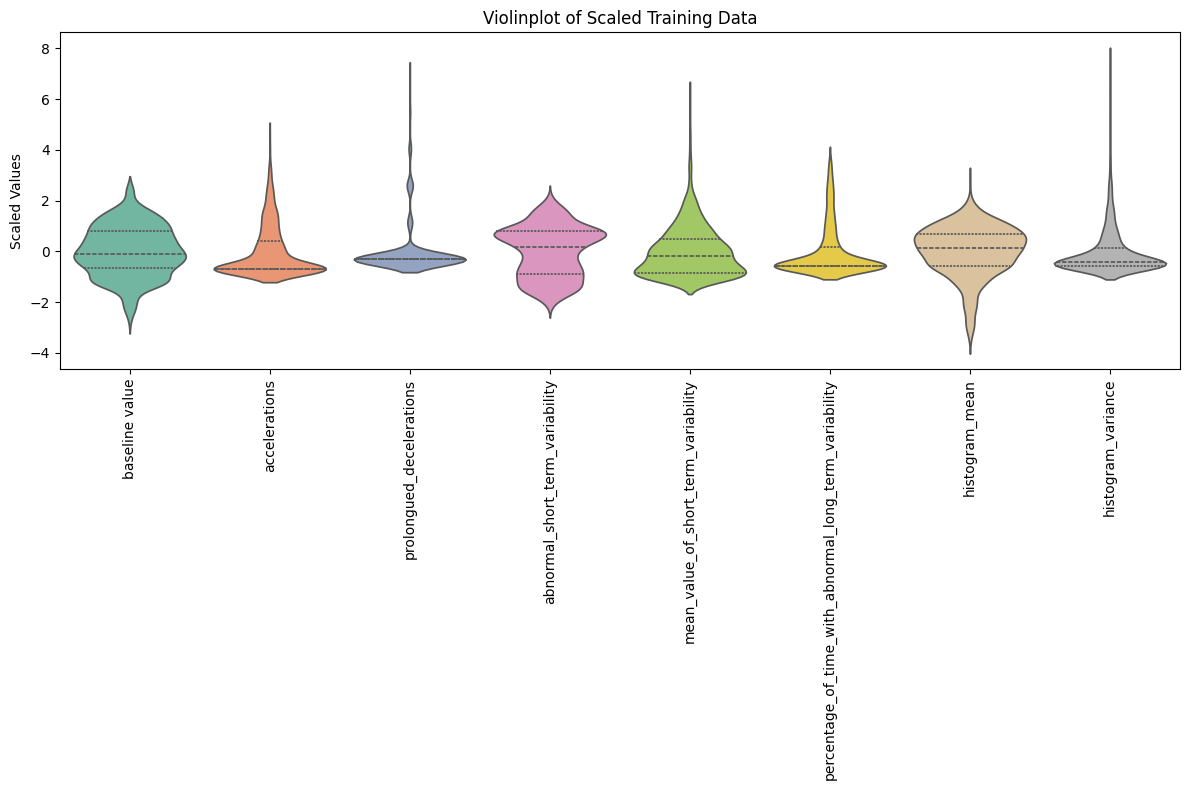

In [17]:
# 2.2 Check by making violin plots
df_scaled = pd.DataFrame(X_train_scaled, columns = df.columns[:-1])


plt.figure(figsize = (12, 8))
sns.violinplot(data = df_scaled, scale = "width", inner = "quartile", palette="Set2")
plt.title("Violinplot of Scaled Training Data")
plt.ylabel("Scaled Values")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

## Part IV: Training and evaluation with different dataset sizes and training times

Often, a larger dataset size will yield better model performance. (As we will learn later, this usually prevents overfitting and increases the generalization capability of the trained model.)
However, collecting data is usually rather expensive.

In this part of the exercise, you will investigate

- how the model performance changes with varying dataset size
- how the model performance changes with varying numbers of epochs/iterations of the optimizer/solver (increasing training time).

For this task (Part IV), use the `Adaline`, `Perceptron`, and `LogisticRegression` classifier from the `mlxtend` library. All use the gradient descent (GD) algorithm for training.

__Important__: Use a learning rate of `1e-4` (`0.0001`) for all classifiers, and use the argument `minibatches=1` when initializing `Adaline` and `LogisticRegression` classifier (this will make sure it uses GD). For all three classifiers, pass `random_seed=42` when initializing the classifier to ensure reproducibility of the results.

### Model training

Train the model models using progressively larger subsets of your dataset, specifically: first 50 rows, first 100 rows, first 150 rows, ..., first 650 rows, first 700 rows (in total $14$ different variants).

For each number of rows train the model with progressively larger number of epochs: 2, 7, 12, 17, ..., 87, 92, 97 (in total $20$ different model variants).

The resulting $14 \times 20 = 280$ models obtained from the different combinations of subsets and number of epochs. An output of the training process could look like this:

```
Model (1) Train a model with first 50 rows of data for 2 epochs
Model (2) Train a model with first 50 rows of data for 7 epochs
Model (3) Train a model with first 50 rows of data for 12 epochs
...
Model (21) Train a model with first 100 rows of data for 2 epochs
Model (22) Train a model with first 100 rows of data for 7 epochs
...
Model (279) Train a model with first 700 rows of data for 92 epochs
Model (280) Train a model with first 700 rows of data for 97 epochs
```

### Model evaluation

For each of the $280$ models, calculate the __accuracy on the test set__ (do __not__ use the score method but compute accuracy yourself).
Store the results in the provided 2D numpy array (it has $14$ rows and $20$ columns).
The rows of the array correspond to the different dataset sizes, and the columns correspond to the different numbers of epochs.

### Tasks
1. Train the $280$ Adaline classifiers as mentioned above and calculate the accuracy for each of the $280$ variants.
2. Generalize your code so that is doing the same procedure for all three classifiers: `Perceptron`, `Adaline`, and `LogisticRegression` after each other. Store the result for all classifiers. You can for example use an array of shape $3\times14\times20$ to store the accuracies of the three classifiers.

Note that executing the cells will take some time (but on most systems it should not be more than 5 minutes).

In [18]:
# Train and evaluate all model variants
# Define the model configurations
model_configurations = {
    "Adaline": Adaline(epochs=1, eta = 1e-4, minibatches=1, random_seed= 42),
    "Perceptron": Perceptron(epochs = 1, eta = 1e-4, random_seed = 42),
    "LogisticRegression": LogisticRegression(epochs = 1, eta = 1e-4, minibatches = 1, random_seed = 42)
}

# Define dataset sizes and n of epochs 
dataset_sizes = list(range(50, 701, 50)) # Should give 14 values, 50, 100, 150, etc
epochs_list = list(range(2, 98, 5)) # 20 values, 2, 7, 12, etc.

# Store in array
accuracy_results = np.zeros((len(model_configurations), len(dataset_sizes), len(epochs_list)))

# Map model names to the array indices
model_index = {name: i for i, name in enumerate(model_configurations.keys())}

# Make function to calculate the accuracy manually
def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Loop for training and evaluation
model_counter = 1
total_models = len(model_configurations) * len(dataset_sizes) * len(epochs_list)

for model_name, base_model in model_configurations.items():
    for size_index, num_samples in enumerate(dataset_sizes):
        X_train_subset = X_train_scaled[:num_samples]
        y_train_subset = y_train[:num_samples]
        
        for epoch_index, num_epochs in enumerate(epochs_list):
            print(f"Model ({model_counter}/{total_models}): {model_name} with {num_samples} samples and {num_epochs} epochs")
            model_counter += 1
            
            # Correct model initialization based on model type
            if model_name == "Perceptron":
                model = Perceptron(epochs=num_epochs, eta=1e-4, random_seed=42)
            else:
                model = base_model.__class__(epochs=num_epochs, eta=1e-4, minibatches=1, random_seed=42)
            
            # Fit the model on the subset of data
            model.fit(X_train_subset, y_train_subset)
            
            # Predict on the test set and calculate accuracy
            y_pred = model.predict(X_test_scaled)
            accuracy = calculate_accuracy(y_test, y_pred)
            
            # Store accuracy in the array
            accuracy_results[model_index[model_name], size_index, epoch_index] = accuracy

# Output the shape to confirm correct processing
print("Shape of accuracy results:", accuracy_results.shape)


Model (1/840): Adaline with 50 samples and 2 epochs
Model (2/840): Adaline with 50 samples and 7 epochs
Model (3/840): Adaline with 50 samples and 12 epochs
Model (4/840): Adaline with 50 samples and 17 epochs
Model (5/840): Adaline with 50 samples and 22 epochs
Model (6/840): Adaline with 50 samples and 27 epochs
Model (7/840): Adaline with 50 samples and 32 epochs
Model (8/840): Adaline with 50 samples and 37 epochs
Model (9/840): Adaline with 50 samples and 42 epochs
Model (10/840): Adaline with 50 samples and 47 epochs
Model (11/840): Adaline with 50 samples and 52 epochs
Model (12/840): Adaline with 50 samples and 57 epochs
Model (13/840): Adaline with 50 samples and 62 epochs
Model (14/840): Adaline with 50 samples and 67 epochs
Model (15/840): Adaline with 50 samples and 72 epochs
Model (16/840): Adaline with 50 samples and 77 epochs
Model (17/840): Adaline with 50 samples and 82 epochs
Model (18/840): Adaline with 50 samples and 87 epochs
Model (19/840): Adaline with 50 samples

### Performance visualization

Plot the performance measure for all classifiers (accuracy on the test set; use the result array from above) of all the $280$ variants for each classifier in a total of three heatmaps using, for example `seaborn` or `matplotlib` directly.

The color should represent the accuracy on the test set, and the x and y axes should represent the number of epochs and the dataset size, respectively.
Which one is x and which one is y is up to you to decide. Look in the example output at the top of the assignment for inspiration for how the plot could look like and how it could be labeled nicely. (But use the correct numbers corresponding to your dataset sizes and number of epochs.)

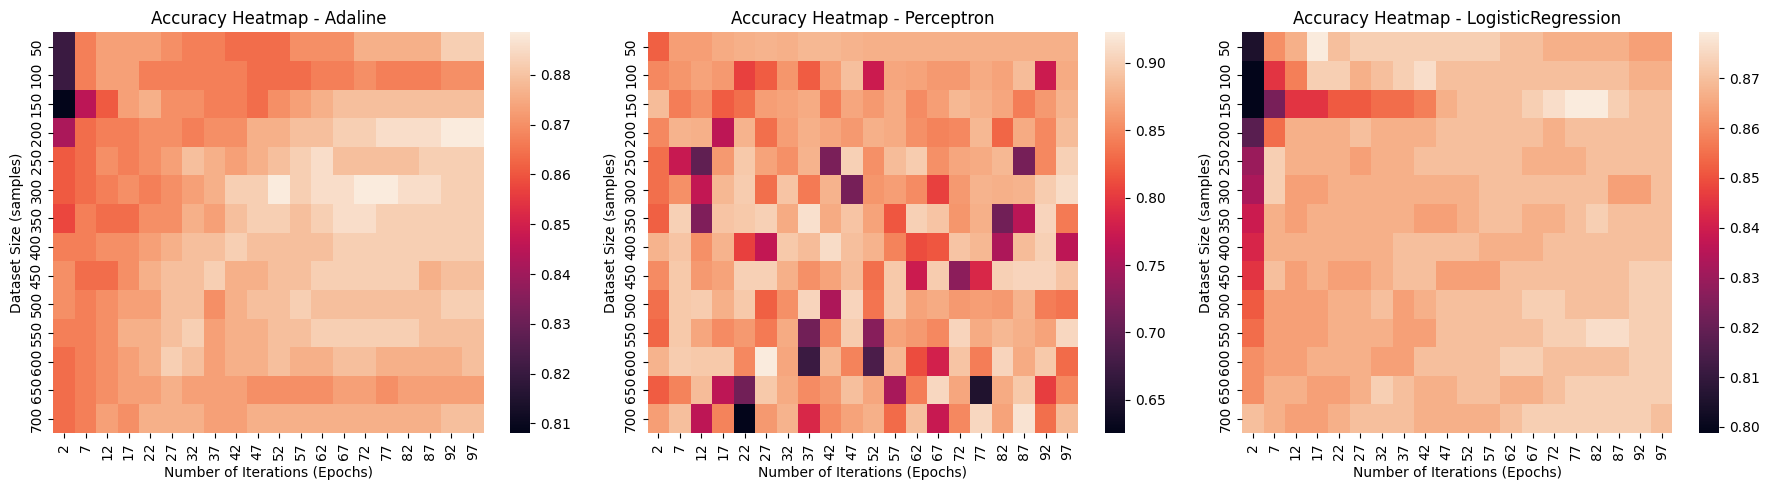

In [21]:
# Define the models in the same order as the accuracy_results
model_names = ["Adaline", "Perceptron", "LogisticRegression"]

# Make heatmaps for each of the models
plt.figure(figsize = (18, 5))

for i, model_names in enumerate(model_names):
    plt.subplot(1, 3, i + 1)
    
    # Create heatmap for model
    sns.heatmap(
        accuracy_results[i],
        annot = False,
        xticklabels = epochs_list,
        yticklabels = dataset_sizes,
        cbar = True
    )
    plt.title(f"Accuracy Heatmap - {model_names}", fontsize = 12)
    plt.xlabel("Number of Iterations (Epochs)", fontsize = 10)
    plt.ylabel("Dataset Size (samples)", fontsize=10)

plt.tight_layout()
plt.show()


# Part V: Some more plotting

For the following cell to execute you need to have the variable `X_test_scaled` with all samples of the test set and the variable `y_test` with the corresponding labels.
Complete at least up until Part III. Executing the cell will plot something.

1. Add code comments explaining what the lines are doing
2. What is the purpose of the plot?
3. Describe all components of the subplot and then comment in general on the entire plot. What does it show? What does it not show?

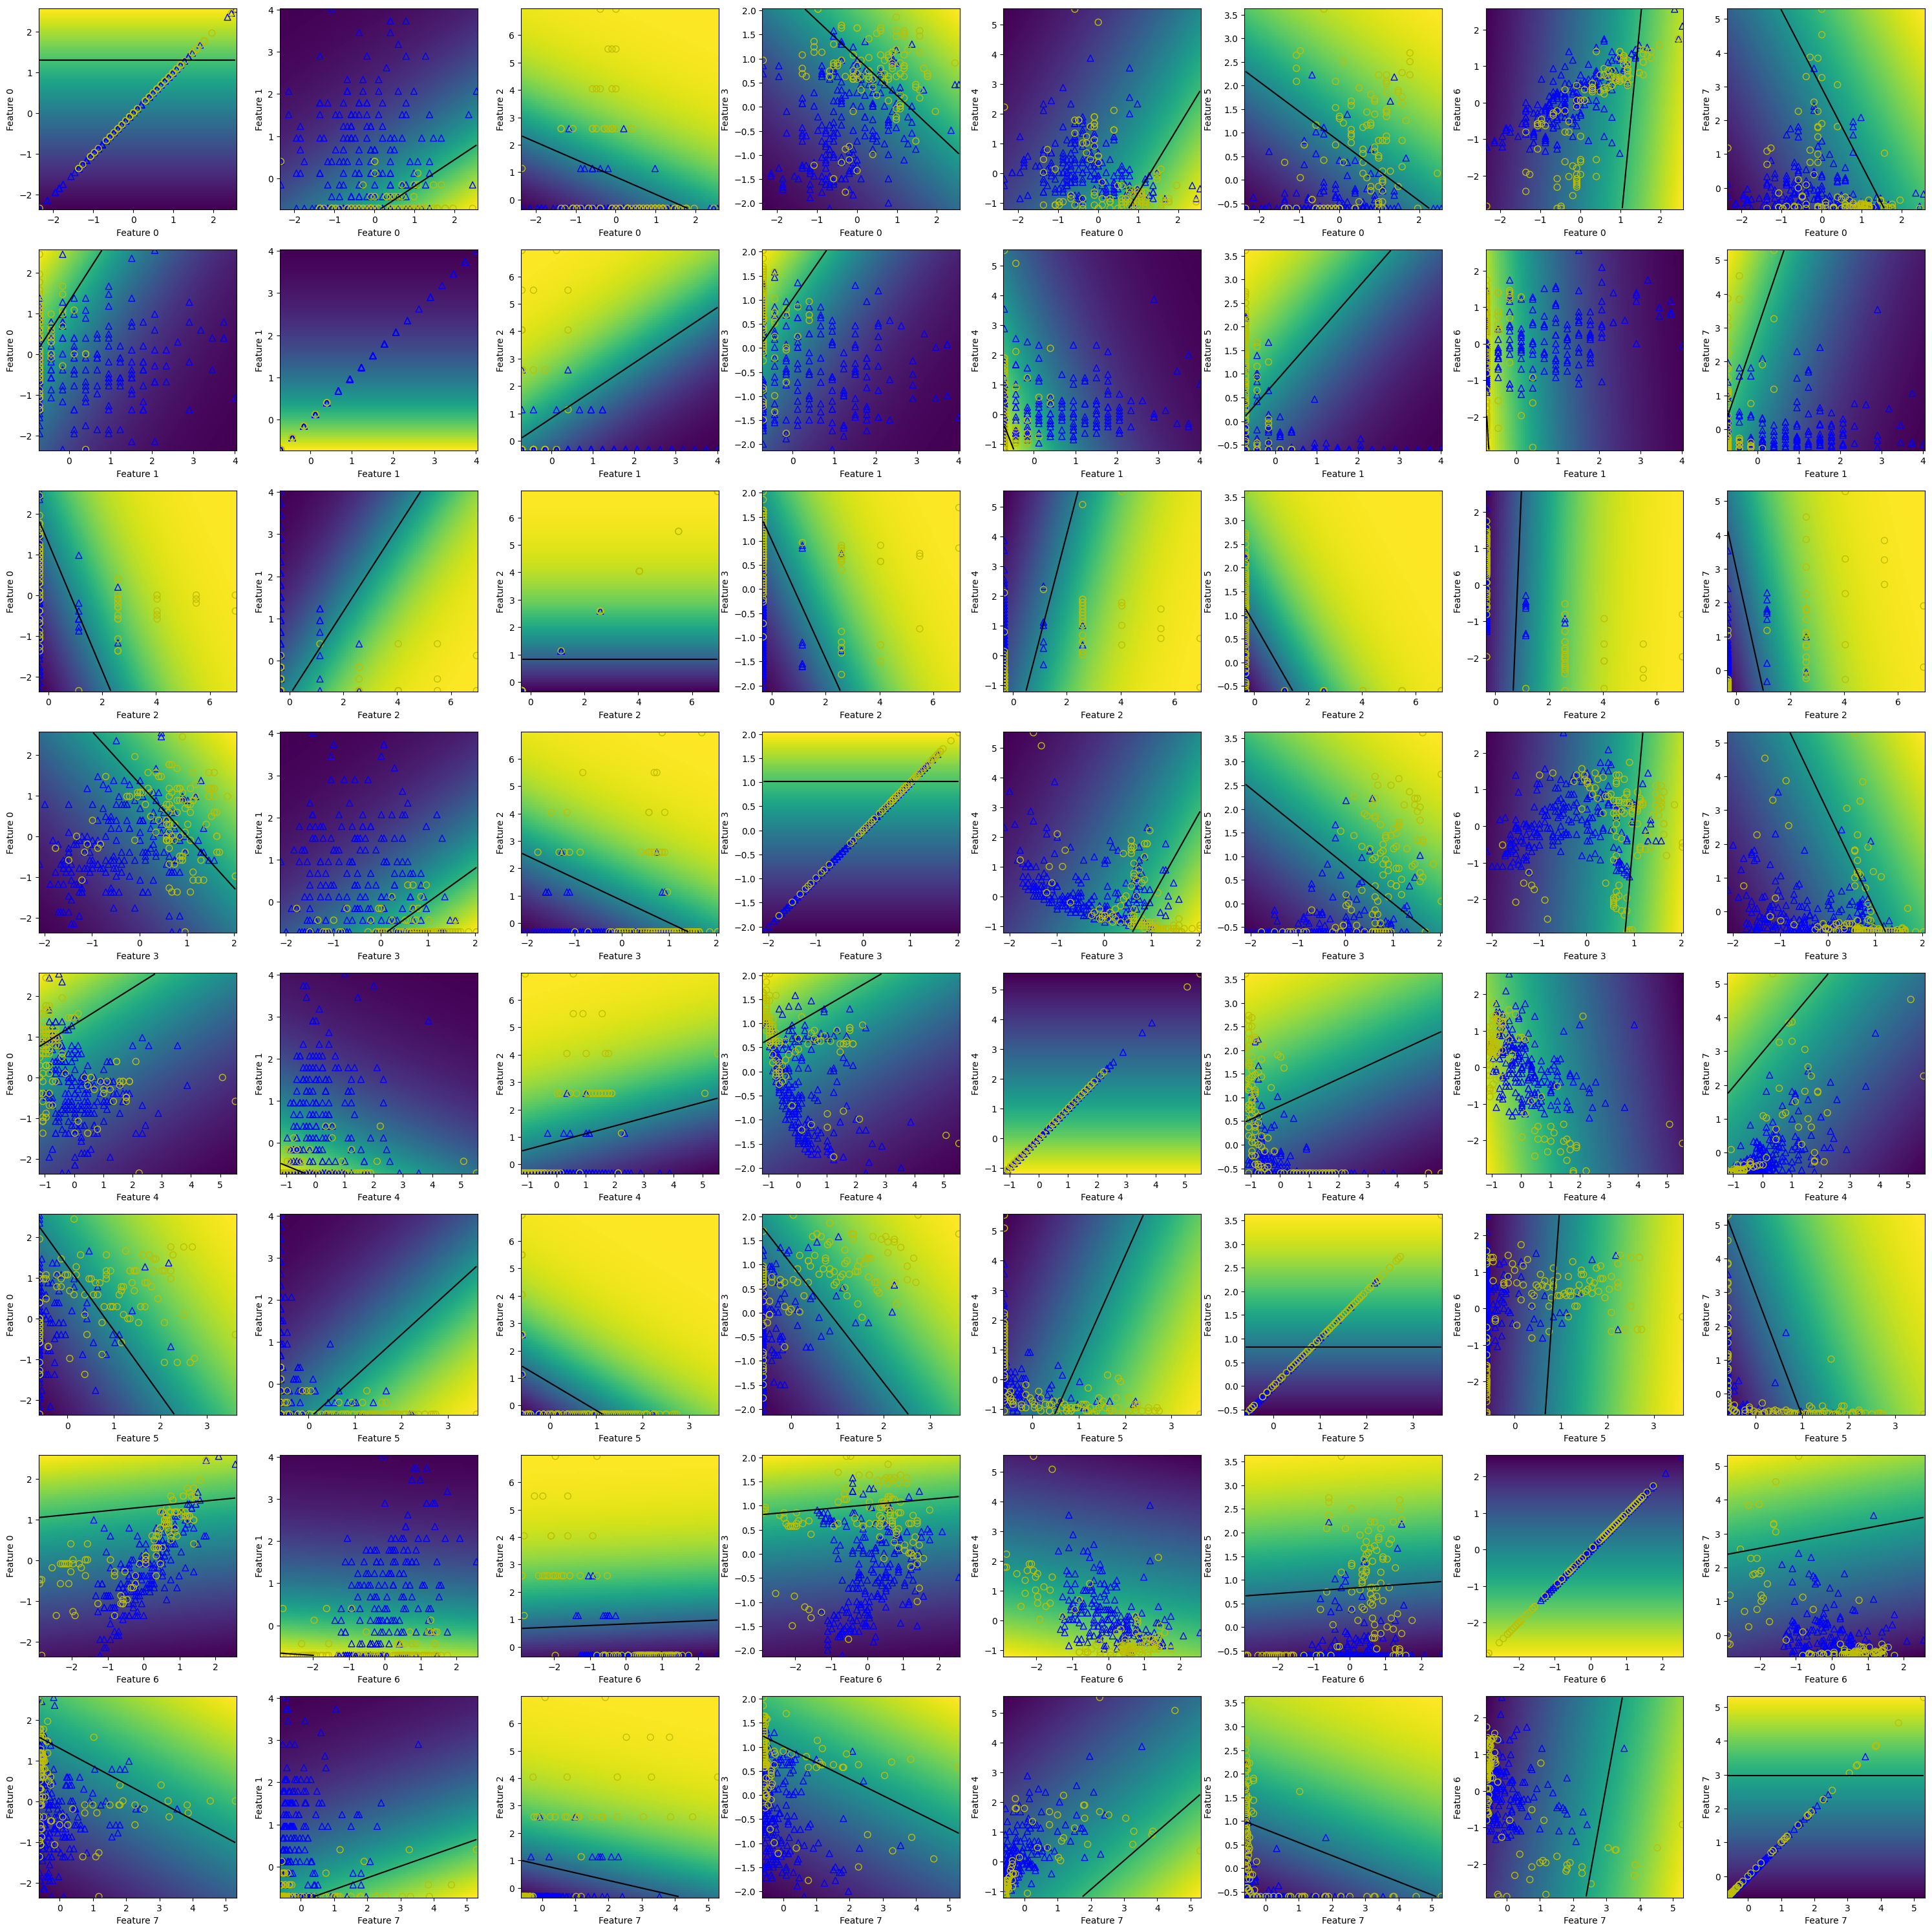

In [22]:
# Train and a logistic regression model with 300 epochs and learning rate 0.0001
clf = LogisticRegression(eta = 0.0001, epochs = 300, minibatches=1, random_seed=42)
clf.fit(X_test_scaled, y_test)

# Create 8x8 grid of subplots to visualize the features pairwise
fig, axes = plt.subplots(8, 8, figsize=(30, 30))
for i in range(0, 8):                               # Iterate over all the combinations of features
    for j in range(0, 8):
        feature_1 = i
        feature_2 = j
        ax = axes[i, j]

        ax.set_xlabel(f"Feature {feature_1}")       # x-label with feature indicies
        ax.set_ylabel(f"Feature {feature_2}")       # y-label with featue indicies
        
        # Calculate the minimum and maximum values of each feature
        mins = X_test_scaled.min(axis=0)
        maxs = X_test_scaled.max(axis=0)

        # Linearly spaced values for feature 1 and 2
        x0 = np.linspace(mins[feature_1], maxs[feature_1], 100)
        x1 = np.linspace(mins[feature_2], maxs[feature_2], 100)

        # Grid for feature space visualisation, creating empty array X_plot with same number of features as the test set
        X0, X1 = np.meshgrid(x0, x1)
        X_two_features = np.c_[X0.ravel(), X1.ravel()]
        X_plot = np.zeros(shape=(X_two_features.shape[0], X_test_scaled.shape[1]))

        # Fill X_plot with values for the selected features, leave other features as zero
        X_plot[:, feature_1] = X_two_features[:, 0]
        X_plot[:, feature_2] = X_two_features[:, 1]

        # Compute predicted probabilities using logistic regression
        y_pred = clf.predict_proba(X_plot)
        Z = y_pred.reshape(X0.shape)        # Reshape the array for predictions to match the grid


        ax.pcolor(X0, X1, Z)                                        # Visualise predicted probability for class 1
        ax.contour(X0, X1, Z, levels=[0.5], colors='k')             # 0.5 indicates the decision boundary
        ax.scatter(X_test_scaled[y_test == 0, feature_1], X_test_scaled[y_test == 0, feature_2], color="b", marker="^", s=50, facecolors="none")    # Plot class 0 samples as blue triangles
        ax.scatter(X_test_scaled[y_test == 1, feature_1], X_test_scaled[y_test == 1, feature_2], color="y", marker="o", s=50, facecolors="none")    # Plot class 1 samples as yellow circles

fig.tight_layout()
plt.show()

#### 2. What is the purpose of the plot?
The purpose is to visualise the decision boundaries of the Logistic Regression model for all the pairs of features.


#### 3. Describe all components of the subplot and then comment in general on the entire plot. What does it show? What does it not show?
- The axes labels indicate which features that is compared (feature i vs. feature j)
- The background (pcolor) shows the predicted probability of class 1 predicted across the feature space.
- The line in the plots are the decision boundary where the model predicts 50% probability between the classes.
- The blue triangles indicates class 0 samples.
- The yellow circles indicates class 1 samples.


The overall plot shows the decision boundaries for all pairs of feature combinations, and highlights how well the model separates classes using two features at a time. This can reveal which feature pairs would provide the best separability for the classes.

## Part VI: Additional discussion

### Part I:
**1. What kind of plots did you use to visualize the raw data, and why did you choose these types of plots?**

We used histograms, whereas one of them also can be called a countplot. The countplot was used to display the distribution of the target variable, to show the count of each class and identify eventual imbalance. The histograms was chosen for the baseline value and acceleration as we found them good for displaying distribution of the data grouped into bins. 
Pairplots was later used to display the linear separability of combinations of pairs of features, with classes. Then the violinplots were made to display the distribution after scaling.

The raw data has also been inspected with basic codes like decribe, info, and head. 

### Part II:
**1. What happens if we don't shuffle the training data before training the classifiers like in Part IV?**

If we don't shuffle the training data, then the classifier would only be trained on class 0 samples. As seen from the df.head(), the first rows of data is only class 0, so the model would be biased if we didn't shuffle it to get samples from both class 1 and 0.


**2. How could you do the same train/test split (Point 1.-4.) using scikit-learn?**

scikit-learn has a function named train_test_split, which would help split the data into training and test sets. The stratify=y could be used as a parameter to replicate the stratified sampling, which would ensure that the proportions of class would be the same in both train and test sets.

### Part IV:
**1. How does increasing the dataset size affect the performance of the logistic regression model? Provide a summary of your findings.**

As we see in the heatmap for Logistic Regression, increasing the dataset will generally improve the model performance. The accuracy varies with the smaller datasets, but with the larger dataset the accuracy stabilizes and improves. 

But at some point, the improvement would slow down, and the accuracy would improve at a much slower rate. 

**2. Describe the relationship between the number of epochs and model accuracy**

The heatmaps shows that increasing the number of epochs will lead to higher accuracy, as more training iterations would allow the model to refine its weights and fit the data better. But again, at some point the improvements becomes marginal. If we continue to train for too long, there would also be a risk of overfitting the data and the model may perform worse on new data. 

This effect is most visible in the plots for Logistic Regression and Adaline, while the Perceptron shows strong fluctuations. 


**3. Which classifier is much slower to train and why do you think that is?**

The Perceptron is much slower than the others because it updates the weights after each misclassified sample. 


**4. One classifier shows strong fluctuations in accuracy for different dataset sizes and number of epochs. Which one is it and why do you think this happens?**

As stated in IV.2, the Perceptron shows strong fluctuations, where there is multiple regions with dark and light boxes. As seen, the dataset is not linearly separable, which makes it hard for Perceptron to find a stable decision boundary. 

